In [1]:
from genobs.lib import *
h = H_atom(0, "D2")
h

Quantum object: dims = [[24], [24]], shape = (24, 24), type = oper, isherm = True
Qobj data =
[[-2.68397359e+10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.68397359e+10  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.68397359e+10  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e

In [2]:
from genobs.lib import *

h = H_atom(0, "D2")
h

Quantum object: dims = [[24], [24]], shape = (24, 24), type = oper, isherm = True
Qobj data =
[[-2.68397359e+10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.68397359e+10  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.68397359e+10  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e

In [3]:
# laser_freq = (get_ket_Fe_D2(3,3).dag()*h*get_ket_Fe_D2(3,3) - get_ket_Fg_D2(2,2).dag()*h*get_ket_Fg_D2(2,2))[0,0]
# Hyperfine Structure with Zeeman levels
b_longitudinal = 1
hb0 = H_hfs_ground() + H_B(bz=b_longitudinal)
eigvals, eigstates = hb0.eigenstates()
F_states_reordered = [
    eigstates[2],
    eigstates[1],
    eigstates[0],
]
for k in range(3, 3 + 5):
    F_states_reordered.append(eigstates[k])
h = H_atom(0, "D2").full()
det = h[-1, -1] - h[7, 7]
h = H_atom(det - 20e9 * 2 * pi, "D2").full()
h[:8, :8] = hb0.transform(F_states_reordered).tidyup(atol=1e-3).full()
shift = h[1, 1]
for k in range(24):
    h[k, k] = h[k, k] - shift
h = Qobj(h)
h_total = (
    h
    + H_atom_field_D2(-1, E_0_plus(250e-6 / (pi * (50e-6) ** 2) / 2))
    + H_atom_field_D2(1, E_0_plus(250e-6 / (pi * (50e-6) ** 2) / 2))
)

(<Figure size 800x600 with 2 Axes>,
 [<AxesSubplot: title={'center': 'F=2'}>,
  <AxesSubplot: title={'center': 'F=1'}>])

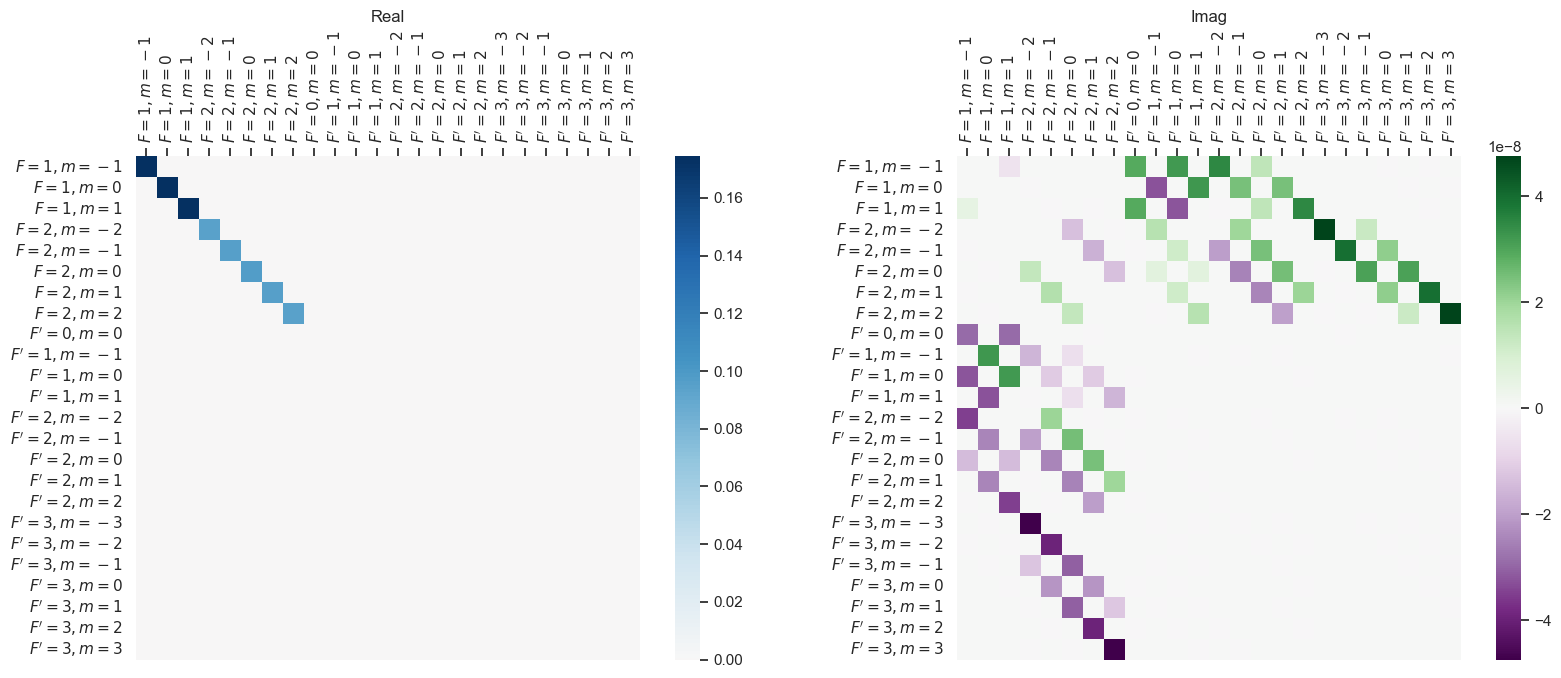

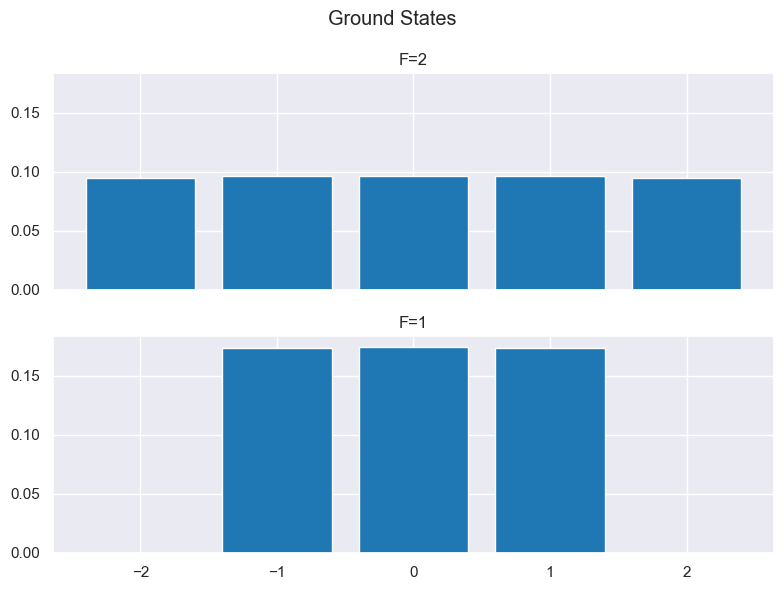

In [4]:
rho_ss = steadystate(h_total, c_op_list=natural_decay_ops_D2())
maplot(rho_ss)
plot_bar_ground_pop(rho_ss)

10.0%. Run time: 8290.13s. Est. time left: 00:20:43:31
20.0%. Run time: 16563.14s. Est. time left: 00:18:24:12
30.0%. Run time: 24835.93s. Est. time left: 00:16:05:50
40.0%. Run time: 33178.21s. Est. time left: 00:13:49:27
50.0%. Run time: 41456.25s. Est. time left: 00:11:30:56
60.0%. Run time: 49732.08s. Est. time left: 00:09:12:34
70.0%. Run time: 58014.49s. Est. time left: 00:06:54:23
80.0%. Run time: 66355.17s. Est. time left: 00:04:36:28
90.0%. Run time: 74688.48s. Est. time left: 00:02:18:18
Total run time: 83014.15s


(<Figure size 1200x600 with 10 Axes>,
 array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: xlabel='Time (s)'>, <AxesSubplot: >,
         <AxesSubplot: >]], dtype=object))

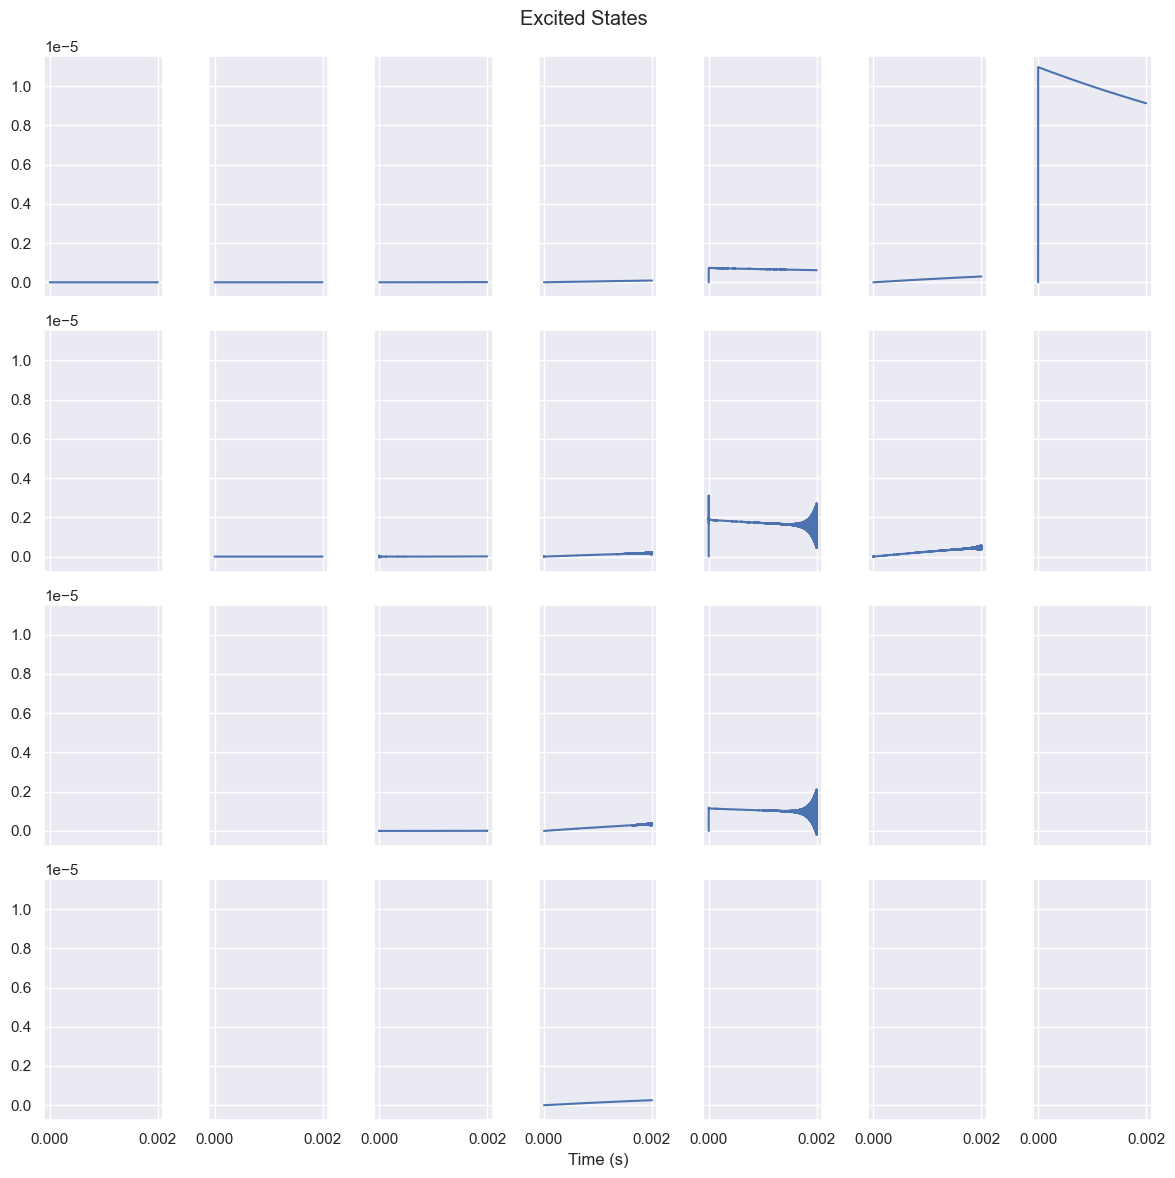

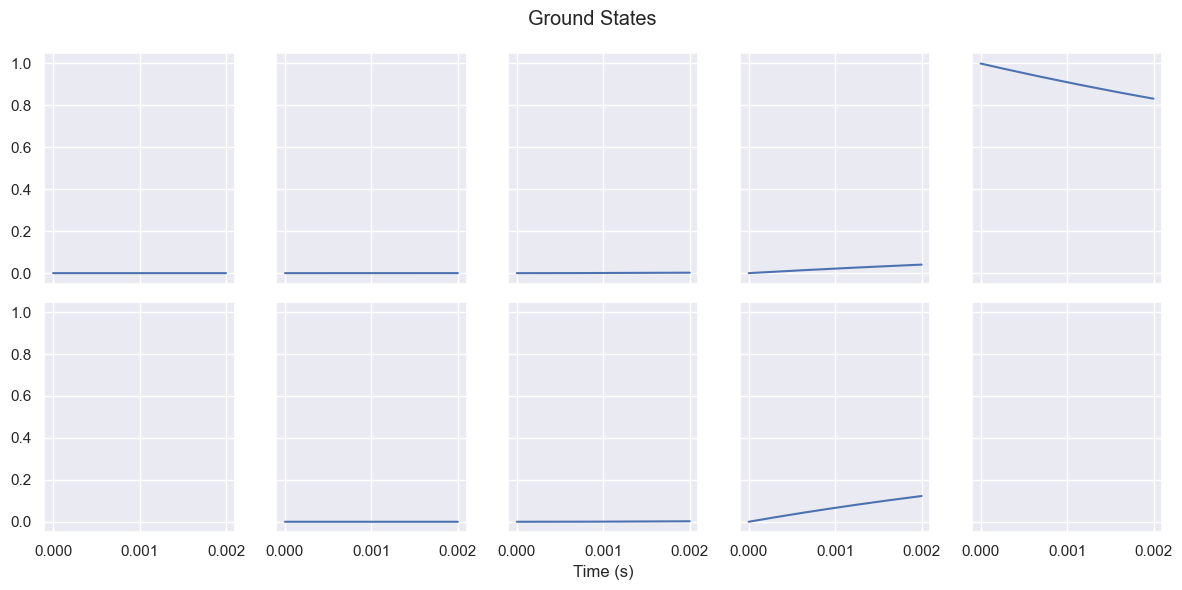

In [5]:
time_evo_options = Options(nsteps=2**10 * 1000)
times = np.linspace(0, 2e-3, 50000)
res = mesolve(
    h_total,
    rho0=get_ket_Fg_D2(2, 2).proj(),
    tlist=times,
    c_ops=natural_decay_ops_D2(),
    options=time_evo_options,
    progress_bar=True,
)
plot_excited_states_time(res)
plot_ground_states_time(res)

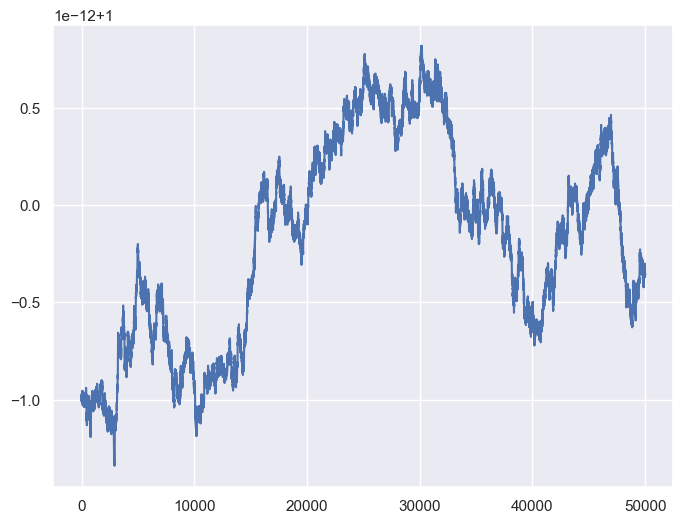

In [6]:
plt.plot([rho.tr() for rho in res.states])

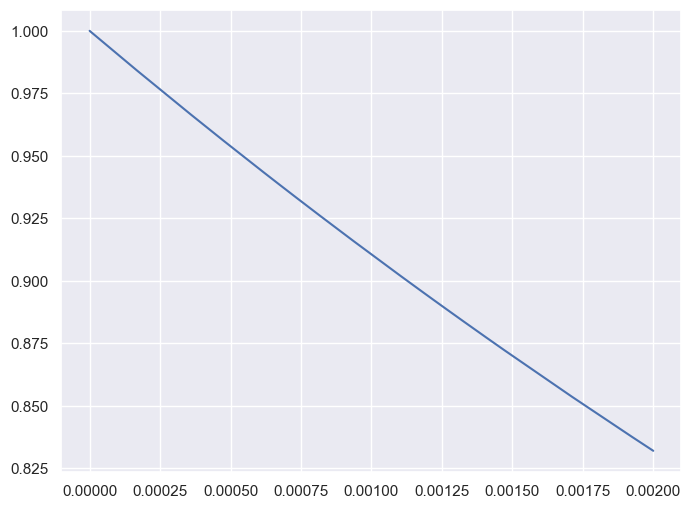

In [7]:
expect = [abs(rho[7, 7]) for rho in res.states]
plt.plot(times, expect)

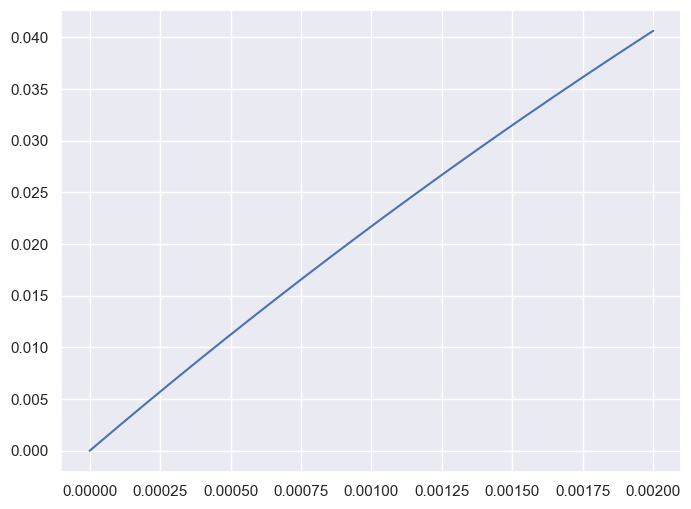

In [8]:
expect = [abs(rho[6, 6]) for rho in res.states]
plt.plot(times, expect)

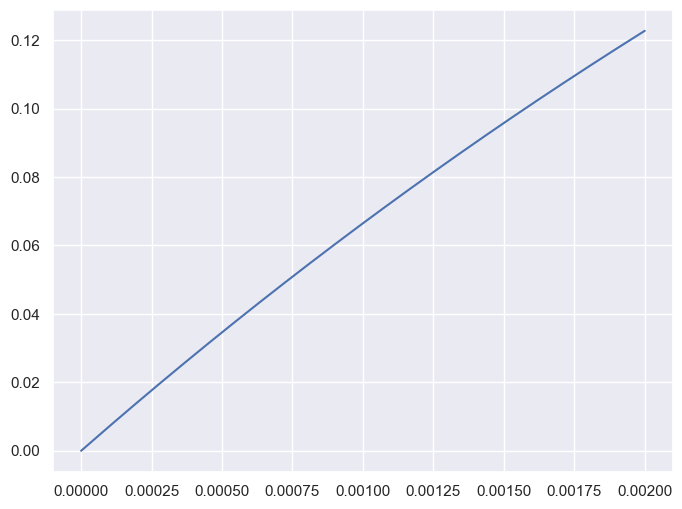

In [9]:
expect = [abs(rho[2, 2]) for rho in res.states]
plt.plot(times, expect)

In [10]:
qsave(res, "result_minus20ghz")